In [7]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
## Compute solar geometry..
# https://gml.noaa.gov/grad/solcalc/solareqns.PDF

In [9]:
def fractional_year(doy, hour_m12_p12):
    # hour_m12_p12 is between -12 and 12
    # 0 being the middle of hte day... ugh
    y = 2*np.pi/365  * (doy - 1 + (hour_m12_p12 - 12)/24) # RADIANS
    return y 


def eqtime(y):
    # Literally called "equation of time"
    #---------------------------------------
    ### equation of time - an astronomical term accounting for changes in the time of solar noon 
    ### for a given location over the course of a year. Earth's elliptical orbit and Kepler's law of 
    ### equal areas in equal times are the culprits behind this phenomenon. 
    ### Click here to see a plot of the equation of time vs. day of the year. 
    ### For more information on this phenomenon, see this offsite Analemma page.
    ### https://gml.noaa.gov/grad/solcalc/glossary.html#equationoftime
    #---------------------------------------
    eqt = 229.18*(0.000075 + 0.001868*np.cos(y) - 0.032077*np.sin(y) - 0.014615*np.cos(2*y) - 0.040849*np.sin(2*y))
    return eqt
              
def time_offset(eqtime, longitude, timezone):
    return eqtime + 4*longitude - 60*timezone

def true_solar_time(hr, mn, sc, time_offset):
    # hour, minute, second, time_offset 
    # this is the .... 
    return (hr*60 + mn + sc/60 + time_offset)/60

def solar_hour_angle(tst):
    # tst is the true solar time 
    ha = (tst / 4) - 180  # THIS IS DEGREES
    # convet to Radians
    return ha*np.pi/180

def declination_angle(doy):
    return .4093*np.sin(2*np.pi/365. * doy - 1.405) # radians

In [97]:
def zenith_angle(lat, phi, wt):
    # lat is latitude
    # phi is solar declination (degrees clockwise from)
    # wt is the solar hour angle
    
    # convert from lat to rads..
    lat = lat*np.pi/180
    
    cosz = np.sin(lat) * np.sin(phi) + np.cos(lat) * np.cos(phi) * np.cos(wt)
    return cosz

In [192]:
def zenith_angle_main(date, lat, long, timezone=-6):
    # start with computing the declination angle. Only a function of fractional year 
    y = fractional_year(date.dayofyear, date.hour-12)
    phi = declination_angle(y)*180./np.pi
    
    ## compute the time offset...
    eqt = eqtime(y)
    to = time_offset(eqt, long, timezone)
    tst = true_solar_time(date.hour, date.minute, 0, to)
    wt = solar_hour_angle(tst)
    
    # now do the zenith angle...
    cza = zenith_angle(lat, phi, wt)

    return np.arccos(cza)*180./np.pi

### Compute zenithtest_date = pd.to_datetime("2017-10-12 01:00")

In [193]:
days_in_year = 365
timezone = -7 # relative to GMT
lat = 35
long = -116.5

### Check Eq.Time

In [194]:
dr = pd.to_datetime("2017-10-16 09:00")
zenith_angle_main(dr, lat, long)

81.3881289740327

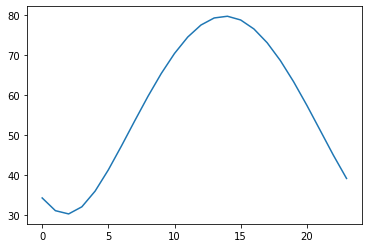

In [195]:
dr = pd.date_range("2017-01-01 00:00", "2017-01-01 23:00", freq="h")
plt.plot([zenith_angle_main(d, lat, long) for d in dr])

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', length=265)

### Plot the Declination Angle --- only depends on DOY!

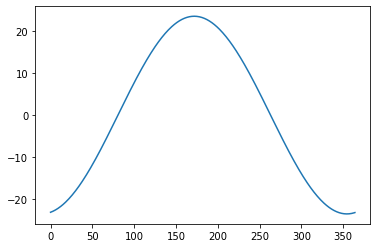

In [207]:
plt.plot([declination_angle(d.dayofyear)*180./np.pi for d in dr])

In [208]:
### EQTIME

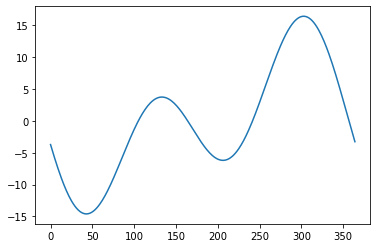

In [209]:
plt.plot([eqtime(d.dayofyear) for d in dr])

dr = pd.date_range("2017-01-01 00:00", "2017-12-31 00:00", freq="D")
### Local Solar Time

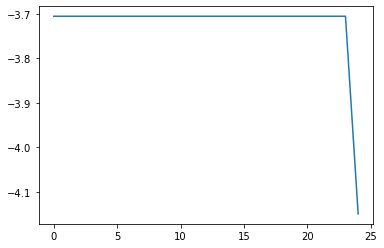

In [213]:
drd = pd.date_range("2017-01-01 00:00", "2017-01-02 00:00", freq="h")
eqt = eqtime(drd.dayofyear)


### Zenith Angle

In [184]:
# The zenith angle is the angle between the sun and the vertical. 
# The zenith angle is similar to the elevation angle but it is measured 
# from the vertical rather than from the horizontal, 
# thus making the zenith angle = 90° - elevation.

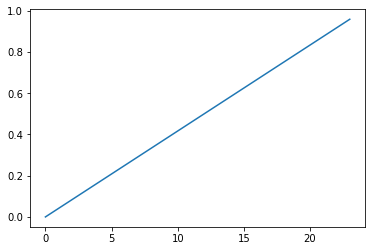

In [218]:
plt.plot([1 + (hour - 12)/24 for hour in range(-12,12)])